### Вопросы, замечания, предложения .... - tlg: @w1024

<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
#Посмотрим на случайные 10 строчек данных
np.random.seed(1)
rand = np.random.randint(len(data))
data[rand:rand+10]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5157,56,105.60,6068.65,Female,0,Yes,No,Yes,No,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
5158,18,50.30,908.75,Female,0,Yes,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,0
5159,64,81.30,5129.3,Female,0,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,Yes,Mailed check,0
5160,23,19.60,426.65,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
5161,7,66.85,458.1,Female,0,No,No,Yes,No,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,0
5162,58,24.35,1423.85,Female,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
5163,47,109.55,5124.55,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,1
5164,5,81.00,389.6,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),1
5165,24,56.35,1381.2,Female,0,No,No,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Credit card (automatic),0
5166,65,99.35,6347.55,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Two year,Yes,Electronic check,0


In [6]:
data.info()
#Nan объектов нет, но проверим есть ли пустые признаки(выбросы)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [7]:
[(data[cols].astype("str") == " ") .sum() for cols in feature_cols]

[0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [8]:
#Видим, что у признака TotalSpent есть пустые строки. Заменим их на 0
new_TotalSpent = data[data['TotalSpent'] != ' ']['TotalSpent']
data["TotalSpent"] = data["TotalSpent"].replace(" ",0).astype(float)

In [9]:
#Проверим теперь наличие выбросов
[(data[cols].astype("str") == " ") .sum() for cols in feature_cols]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

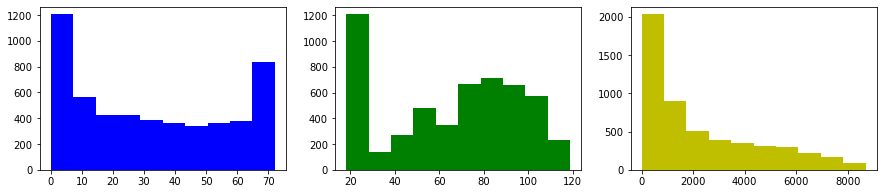

In [10]:
#Построим гистограммы для численных признаков
plt.figure(figsize=(15, 3))
[ ( plt.subplot(1, 3, i+1), plt.hist(data[cols],color=color)) for i,cols,color in zip(range(3),num_cols,['b','g','y'])]
verbose=False


In [11]:
#Посчитаем количество каждого значения для каждого категориального признака
[data[cat].value_counts() for cat in cat_cols]

[Male      2655
 Female    2627
 Name: Sex, dtype: int64,
 0    4440
 1     842
 Name: IsSeniorCitizen, dtype: int64,
 No     2705
 Yes    2577
 Name: HasPartner, dtype: int64,
 No     3676
 Yes    1606
 Name: HasChild, dtype: int64,
 Yes    4761
 No      521
 Name: HasPhoneService, dtype: int64,
 No                  2511
 Yes                 2250
 No phone service     521
 Name: HasMultiplePhoneNumbers, dtype: int64,
 Fiber optic    2341
 DSL            1800
 No             1141
 Name: HasInternetService, dtype: int64,
 No                     2612
 Yes                    1529
 No internet service    1141
 Name: HasOnlineSecurityService, dtype: int64,
 No                     2332
 Yes                    1809
 No internet service    1141
 Name: HasOnlineBackup, dtype: int64,
 No                     2317
 Yes                    1824
 No internet service    1141
 Name: HasDeviceProtection, dtype: int64,
 No                     2604
 Yes                    1537
 No internet service    1141

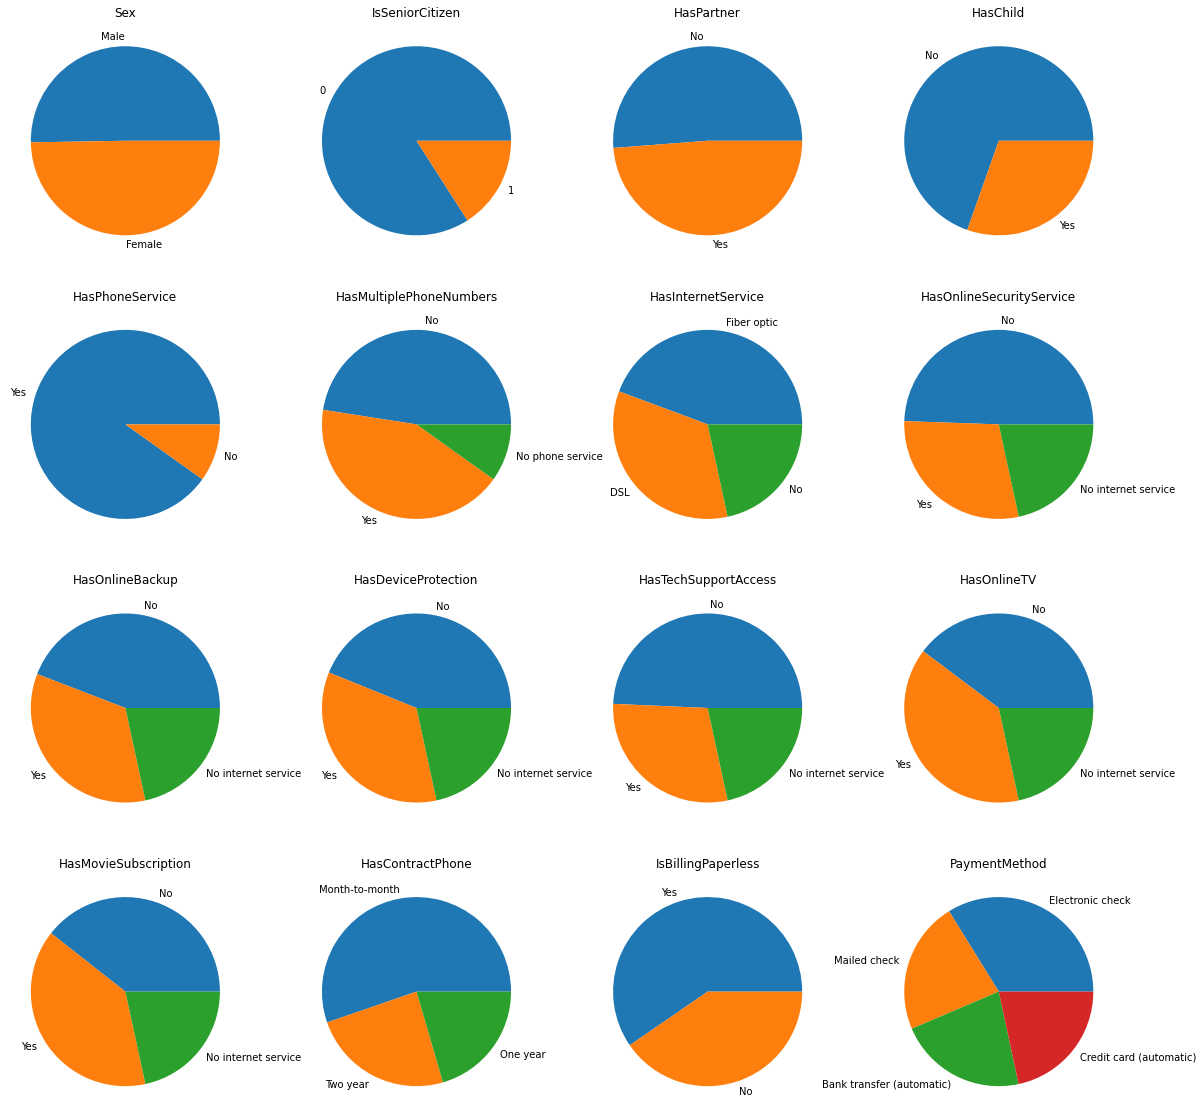

In [12]:
# Для каждой колонки построим круговые диаграммы
plt.figure(figsize=(20, 20))
[ ( plt.subplot(4, 4, i+1),plt.title(cols), plt.pie(data[cols].value_counts().array,labels=data[cols].value_counts().index)) for i,cols in zip(range(16),cat_cols)]
verbose=False


In [13]:
data["Churn"].value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

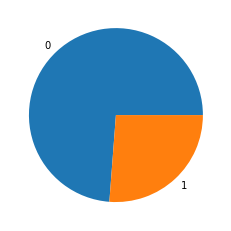

In [14]:
#Посмотрим на распределение целевой переменной. Видим, что классы несбалансированны
plt.pie(data["Churn"].value_counts(),labels=["0",'1'])
verbose=False


(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [15]:
data = data.drop_duplicates()
#data = data.drop("HasPhoneService",axis=1)

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [16]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline,Pipeline

In [17]:
#Отнормируем числовые признаки
scaler = StandardScaler()
data_num_cols = scaler.fit_transform(data[num_cols])
#Преобразуем категориальные
le = LabelEncoder()
data_cat_cols = [le.fit_transform(data[cols]) for cols in cat_cols]
ohe = OneHotEncoder()
a = [ohe.fit_transform(data_cat_cols[i].reshape(-1,1)).toarray() for i in range(16)]
data_cat_cols = np.hstack( [a[i] for i in range(16)] )
#Объединим "новые признаки"
new_data = np.hstack((data_num_cols,data_cat_cols))

In [18]:
logist = LogisticRegression()
params = [{'C': [100, 10, 1, 0.1, 0.01, 0.001]}]
logist_grid = GridSearchCV(logist, params, cv=5, scoring='roc_auc', n_jobs=-1)
logist_grid.fit(new_data, data["Churn"])


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [100, 10, 1, 0.1, 0.01, 0.001]}],
             scoring='roc_auc')

In [19]:
logist_grid.best_params_

{'C': 10}

In [20]:
score_1 = logist_grid.cv_results_.get("mean_test_score").mean()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

#### Лучшее качество 0.842543173480628, параметры: "C" : 10

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [21]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_validate
cat = CatBoostClassifier(cat_features=cat_cols,ignored_features=["HasPhoneService"],verbose=False)
cat.fit(data[feature_cols], data["Churn"])


In [22]:
print(cat.tree_count_, cat.learning_rate_)

1000 0.020944999530911446


In [ ]:
score_2 = cross_validate(cat, data[feature_cols], data["Churn"], cv=3, scoring="roc_auc").get("test_score").mean()

In [ ]:
score_2

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

#### Лучшее качество: 0.8409026427400345 , параметры: "tree_count_" = 1000,"learning_rate_" = 0.020944999530911446

# Предсказания

In [ ]:
best_model = cat

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv',index_col=0)
submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

### Результат на Kaggle: 0.85259